# **Prospecting for 200 New Oil Wells for Oil Company**

## **Introduction**

This project is part of a strategic initiative at OilyGiant (not a real company) to identify and develop 200 new potential profitable oil wells. The primary objective is to determine the most lucrative locations for oil extraction by leveraging data analysis and predictive modeling techniques. The outcome will guide decision-making on which areas offer the best financial returns and the lowest risks.

### **Goal**

The goal of this project are these below:

1. **Profit Estimation**: Determine the average profit for each potential well and establish a 95% confidence interval for these estimates.
2. **Risk Assessment**: Evaluate the potential loss percentage to understand the risk associated with each well.
3. **Area Selection**: Identify the most suitable geographic area for oil extraction based on projected profits and risk assessments.

### **Stages**

The stages of this project are below:

1. **Data Preparation and Exploration**
   - Load and examine the data provided.
   - Conduct an exploratory data analysis to understand the general characteristics and distribution of the data.

2. **Model Development and Training**
   - Develop a machine learning model to predict the oil reserves in new wells.
   - Train the model using the provided data and validate its performance.

3. **Model Evaluation**
   - Implement bootstrapping techniques to estimate the profitability and assess the risk.
   - Calculate key metrics such as the average predicted reserves, confidence intervals, and potential losses.

4. **Area Selection**
   - Use the model's predictions to identify the top-performing wells.
   - Select the geographic areas with the highest total projected profits.

5. **Conclusion Drawing**
   - Summarize findings and make recommendations on the most profitable areas for oil well development.
   - Ensure the selected areas meet the criteria of having less than 2.5% risk of loss.

### **Data Content**

The data provided includes:

- **Non-Categorical Data**:
  - `id`: Unique identifier for each oil well.

- **Features**:
  - `f0`, `f1`, `f2`: Various features related to the oil wells.

- **Target**:
  - `product`: Oil reserve volume (1 unit = 1,000 barrels).

### **Project Description**

1. **Data Analysis**:
   - Review parameters from existing wells, including oil quality and reserve volumes, using the provided datasets.

2. **Model Training**:
   - Train and validate a predictive model for oil reserves based on historical data from three distinct regions.

3. **Profitability Analysis**:
   - Calculate and compare the projected average revenue from oil wells in each region.
   - Ensure the investment aligns with a minimum average return of $500,000 per well to avoid losses.

4. **Risk and Profit Calculation**:
   - Implement bootstrapping to estimate profit distributions and assess risk.
   - Select regions with the highest average profit and lowest risk.

5. **Recommendation**:
   - Provide a well-reasoned recommendation for the best region to develop new oil wells, supported by your analysis.

### **Project Constraints**

- Use linear regression for model training.
- The budget for developing 200 wells is USD 100 million.
- Revenue from one barrel of crude oil is USD 4.50, making each unit of the product worth USD 4,500.
- Consider only regions with less than a 2.5% risk of loss for the final recommendation.

**Note**: The data provided is simulated and does not include real contract details or specific well characteristics.


## **Data Loadment**

### **Importing Libraries**

In [1]:
# Import necessary libraries

# Import libraries for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for machine learning
from sklearn.linear_model import LinearRegression

# Import libraries for metrics
from sklearn.metrics import mean_squared_error

### **Data Loadment**

In [2]:
path0 = '/content/geo_data_0.csv'
path1 = '/content/geo_data_1.csv'
path2 = '/content/geo_data_2.csv'

In [3]:
# Loading data 0
data0 = pd.read_csv(path0)
data0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# Loading data 1
data1 = pd.read_csv(path1)
data1.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
# Loading data 2
data2 = pd.read_csv(path2)
data2.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### **Data Quality Checking**

#### **General Information**

In [6]:
# Data 0
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Data 1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# Data 2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### **Duplicated data**

In [9]:
# Data 0
data0.duplicated().sum()

0

In [10]:
# Data 1
data1.duplicated().sum()

0

In [11]:
# Data 2
data2.duplicated().sum()

0

## **Exploratory Data Analysis**

### **Correlation**

Since the data seems to be masked, we can not properly gave judgement based on the number, instead we can use correlation in order to understand the relation for each data.

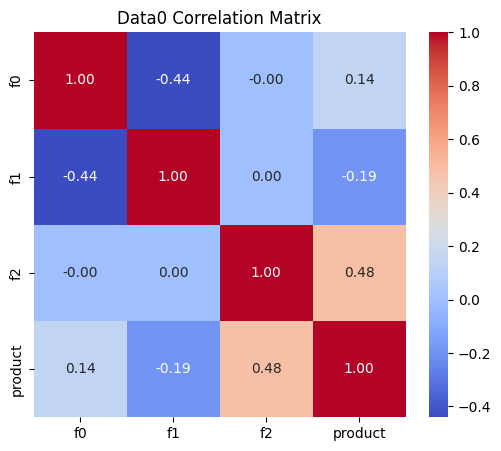

In [19]:
# Correlation in data0
corr0 = data0[['f0', 'f1', 'f2', 'product']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
plt.title('Data0 Correlation Matrix')
sns.heatmap(corr0, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

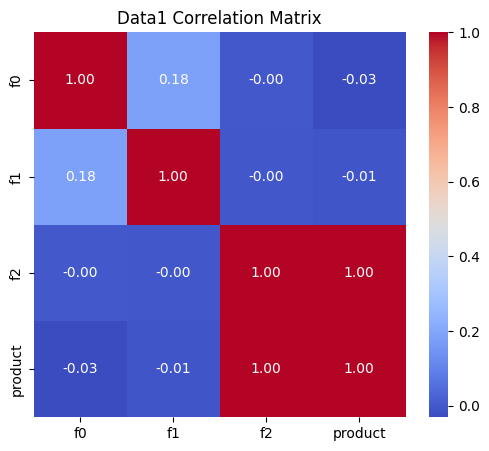

In [18]:
# Correlation in data1
corr1 = data1[['f0', 'f1', 'f2', 'product']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
plt.title('Data1 Correlation Matrix')
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

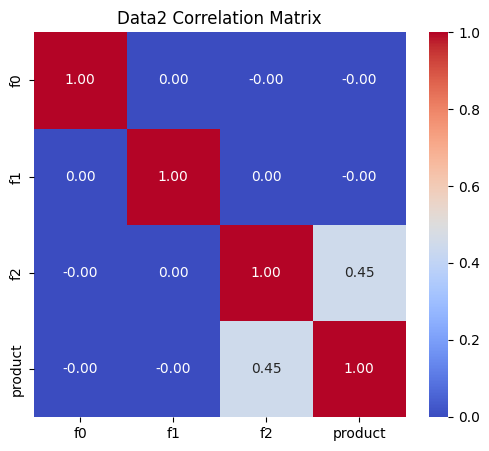

In [20]:
# Correlation in data2
corr2 = data2[['f0', 'f1', 'f2', 'product']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
plt.title('Data2 Correlation Matrix')
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### **Data Distribution**

<Figure size 400x300 with 0 Axes>

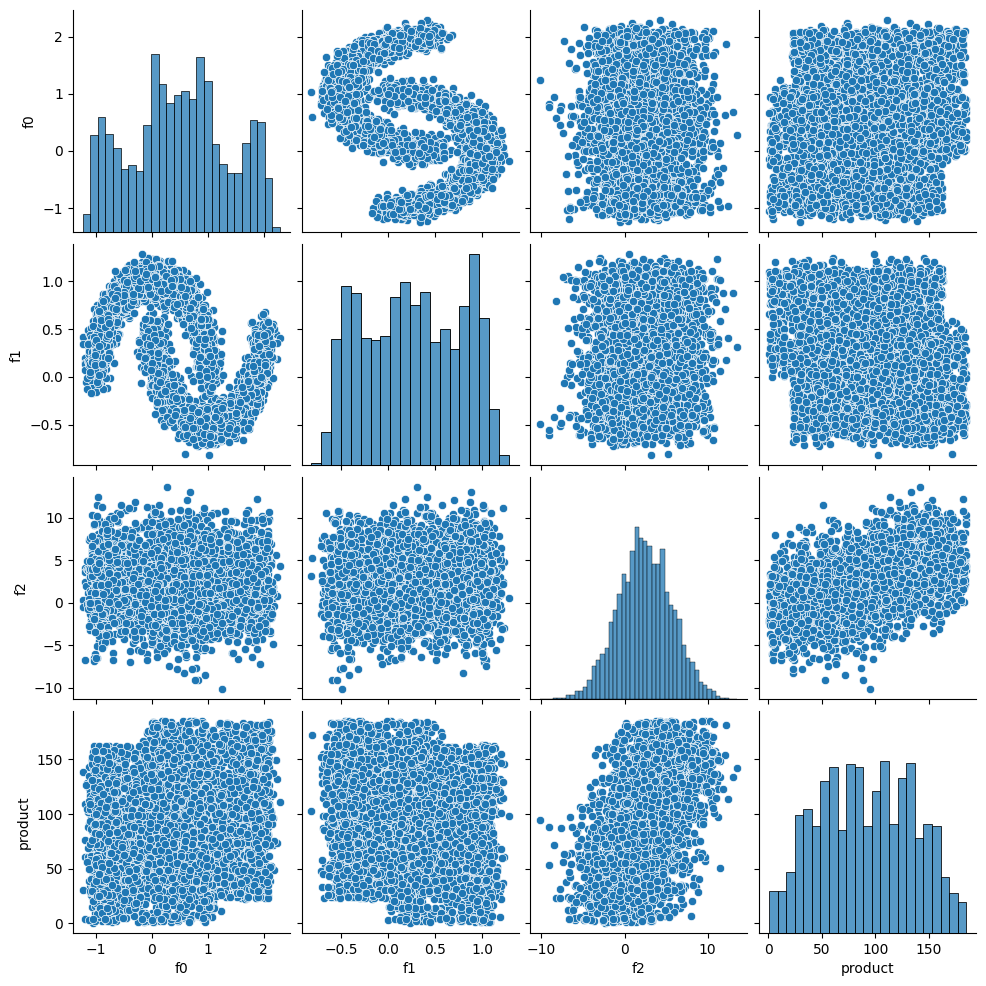

In [23]:
# Features data distribution in data0
plt.figure(figsize=(4, 3))
sns.pairplot(data0[['f0', 'f1', 'f2', 'product']].sample(frac=0.05))
plt.show()

<Figure size 400x300 with 0 Axes>

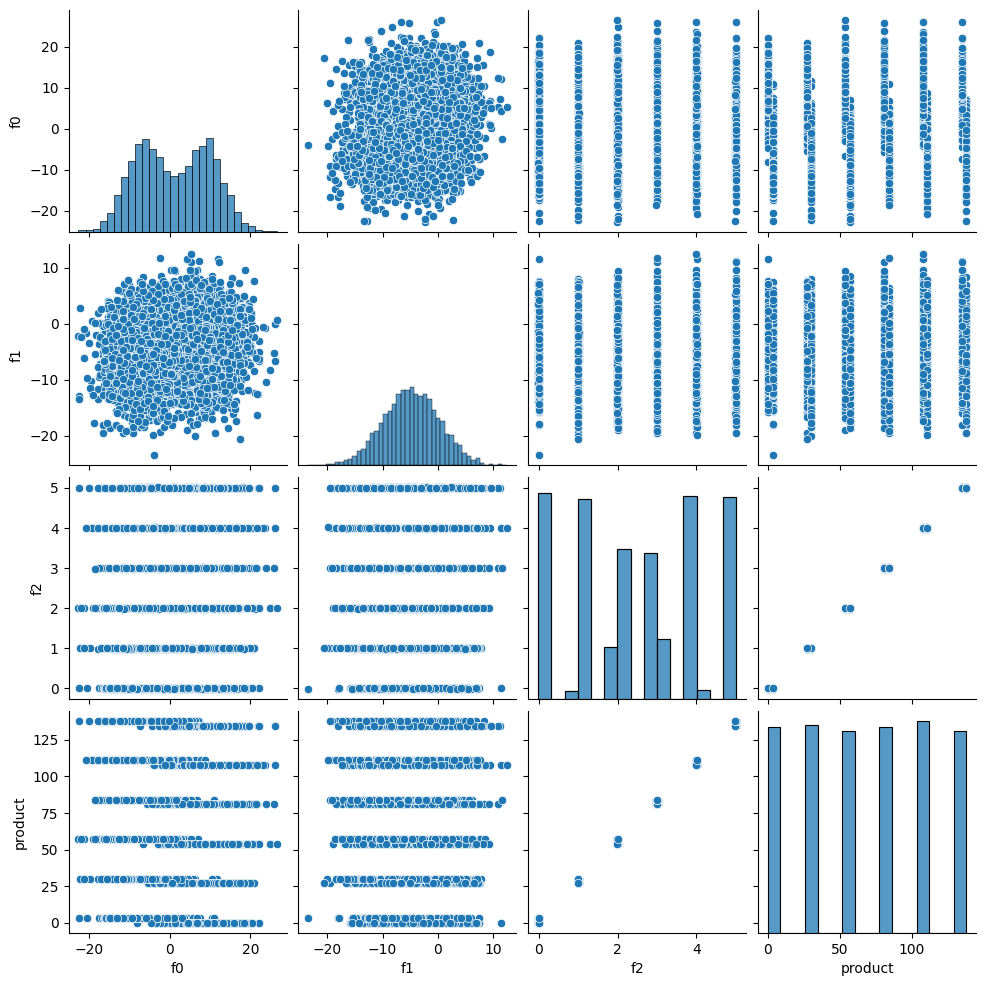

In [24]:
# Features data distribution in data1
plt.figure(figsize=(4, 3))
sns.pairplot(data1[['f0', 'f1', 'f2', 'product']].sample(frac=0.05))
plt.show()

<Figure size 400x300 with 0 Axes>

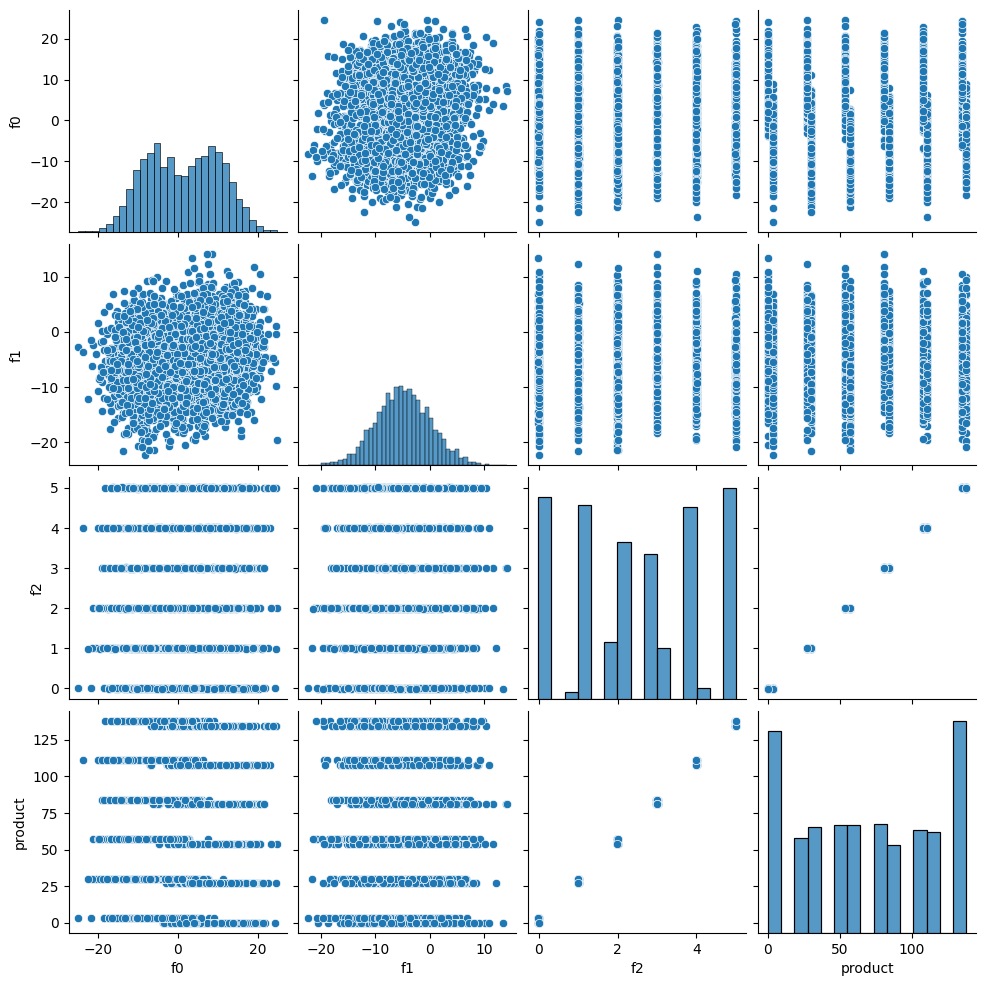

In [25]:
# Features data distribution in data2
plt.figure(figsize=(4, 3))
sns.pairplot(data1[['f0', 'f1', 'f2', 'product']].sample(frac=0.05))
plt.show()

Insight

Based on the data checking and exploragtory, it can resumed as below:

1. All of the three data indicate no sign of duplicate value, inproper type of data, and missing value.
2. Using correlation function we found that f2 and product tend to have high positive correlation. Particuliarly in the data1 where the correlation is solid 1, while the data0 has 0.48 and data2 has 0.45.
3. Using pairplot function also indicate that f2 and product are correlated while other f0 and f1 tend to have no correlation.

## **Developing Machine Learning Model**

Create a loop to develop the machine learning model for three data simultaneously.

### **MAPE (Mean Absolute Percentage Error)**

Create MAPE (Mean Absolute Percentage Error) loop. MAPE being used to understand the average of error between prediction and actual in percentage. In this case loop needed due to the number of data is 3.

In [26]:
def mape(target_actual, target_predict):
    metric = pd.Series(abs(target_actual - target_predict) / target_actual).replace(np.inf, 0).mean() * 100
    return metric

### **Develop Machine Learning Model**

Loop is created as purpose below:

1. To devide the data into features and targets.
2. To train the model (in this case we only use Linear Regression.
3. To do the prediction (both for train and test).
4. To do metric evaluation from model (both for train and test).
5. To calculate the RMSE (Root Mean Square Error).
6. To calculate the MAPE (Mean Absolute Percentage Error).
7. To calculate the average prediction of oil production.

In [27]:
def create_model(dataframe, data_cat):
    # Divide into features and targets from
    features = dataframe[['f0', 'f1', 'f2']]
    target = dataframe['product']

    # Train Test Split
    features_train, features_val, target_train, target_val = train_test_split(features, target, train_size=0.75, random_state=10)

    # Model Training
    lr = LinearRegression()
    lr.fit(features_train, target_train)

    # Data Prediction
    target_pred_train = lr.predict(features_train)
    target_pred_val  = lr.predict(features_val)

    # Metric evaluation from model
    rmse_train = np.sqrt(mean_squared_error(target_train, target_pred_train))
    rmse_val = np.sqrt(mean_squared_error(target_val, target_pred_val))

    # Print RMSE
    print('Data         :', data_cat, '----------------------')
    print('RMSE Train   :', round(rmse_train, 2))
    print('RMSE Val     :', round(rmse_val, 2))

    # Print MAPE
    print('MAPE Train   :', round(mape(target_train, target_pred_train), 2), '%')
    print('MAPE Val     :', round(mape(target_val, target_pred_val), 2), '%')

    # Average predicted volume of oil production
    mean_volume = target_pred_val.mean()
    print('Oil Volume:', round(mean_volume, 2))

    result = pd.DataFrame({'actual': target_val, 'predict': target_pred_val})

    return result



In [28]:
# Data 0
result0 = create_model(dataframe=data0, data_cat=0)

# Data 1
result1 = create_model(dataframe=data1, data_cat=1)

# Data 2
result2 = create_model(dataframe=data2, data_cat=2)

Data         : 0 ----------------------
RMSE Train   : 37.64
RMSE Val     : 37.85
MAPE Train   : 147.33 %
MAPE Val     : 245.61 %
Oil Volume: 92.41
Data         : 1 ----------------------
RMSE Train   : 0.89
RMSE Val     : 0.89
MAPE Train   : 2.86 %
MAPE Val     : 2.82 %
Oil Volume: 68.83
Data         : 2 ----------------------
RMSE Train   : 40.06
RMSE Val     : 40.05
MAPE Train   : 200.68 %
MAPE Val     : 237.09 %
Oil Volume: 94.96


Insight

Based on the calculation it can conclude that:

1. Data1 has the most low RMSE for both train and validation for only 0.89 or less than 1 barrel. This indicate that the the model is doing a good job at accurately predicting the target variable.
2. Data1 also has the most low MAPE for only 2.86%. This means that the error of the model is relatively low in compare with other data.

## **Model Valuation**

### **Profit calculation based on best scenario**

The model valuation can defined as below:

In [29]:
budget             = 100000000
revenue_per_unit   = 4500
well               = 200
cost_per_well      = budget / well
min_barrel         = cost_per_well / revenue_per_unit
print('Minimum Revenue per well       : $', round(cost_per_well, 2))
print('Minimum Oil Volume prodcuted   :', round(min_barrel, 2), ' thousand barrels')

Minimum Revenue per well       : $ 500000.0
Minimum Oil Volume prodcuted   : 111.11  thousand barrels


As the project requirement the minimum revenue per well is $500.000 and minimum oil producted from each well is 111.11 thousand barrels in order to reach profitability.

Loop to calculate profit each region:
1. Calculate the sum of profit from the top 200 productive oil well by sorting it and calculate the revenue with 4500 USD for each unit.
2. Substract the sum of each region with the budget of $100.000.000.

In [30]:
def profit(dataframe):
    result = dataframe.sort_values(by='predict', ascending=False).head(200)
    volume_oilwell = result['actual'].sum()
    profit = volume_oilwell * 4500 - 100000000
    return profit

In [31]:
# Best Case Scenario

profit0 = profit(dataframe=result0)
print('Profit by Region 0: $', profit0)
print('----------------------------------------')

profit1 = profit(dataframe=result1)
print('Profit by Region 1: $', profit1)
print('----------------------------------------')

profit2 = profit(dataframe=result2)
print('Profit by Region 2: $', profit2)

Profit by Region 0: $ 33878788.72465652
----------------------------------------
Profit by Region 1: $ 24150866.966815114
----------------------------------------
Profit by Region 2: $ 24318900.20714976


Insight

Based on the model valuation it can conclude that:

1. The most profitable region is region0 with profit of more than 33 million USD, and the other two is at 24 million USD.
2. Bear in mind that this is the best scenario and the model MAPE for region0 is 245% for test set.
    

## **Bootstrapping**

Bootstrapping is implemented to compute confidence interval.
In this case we can set with 1000 iterations.

In [32]:
def bootstrap_profit(dataframe, bootstrap=1000):
    state = np.random.RandomState(10)

    list_profit = []
    for simulasi in range(bootstrap):
        sample = dataframe.sample(n=500, random_state=state)
        sample_profit = profit(sample)
        list_profit.append(sample_profit)

    return pd.Series(list_profit)

Loop is once again created to analyze the range of confidence, average of profit each well and the risk of loss.
In this case we can set as follow:

1. Confidence interval at 0.95
2. Iteration at 1000

In [33]:
def business_calculation(data, iteration=1000):
    boot = bootstrap_profit(dataframe=data, bootstrap=iteration)
    confidence_inteval = 0.95
    alpha = 1 - confidence_inteval
    min = int(boot.quantile(alpha/2))
    max = int(boot.quantile(1-alpha/2))
    avg = int(boot.mean())
    risk = round((boot < 0).mean() * 100, 2)
    print(f'Range Confidence : $({min}) - $({max})')
    print(f'Average profit   : ${avg}')
    print(f'Risk of Loss     : {risk}%')

In [34]:
print('Result Region 0')
business_calculation(data=result0)

print('Result Region 1')
business_calculation(data=result1)

print('Result Region 2')
business_calculation(data=result2)

Result Region 0
Range Confidence : $(-1552973) - $(8872630)
Average profit   : $3863187
Risk of Loss     : 7.9%
Result Region 1
Range Confidence : $(688561) - $(8423017)
Average profit   : $4704832
Risk of Loss     : 0.8%
Result Region 2
Range Confidence : $(-1899006) - $(8774106)
Average profit   : $3536168
Risk of Loss     : 9.8%


Insight

Based on the calculation of range confidence, average profit, and risk of loss:

1. The best area to exploit is region1 with the most average profit of $4.704.832 per oil well.
2. The risk of loss is relatively low at 0.8% in compare with other regions exceding 5%.

## **Conclusion**

1. The goal of this project is to understand the region which predicted to produce more oil among other three.
2. Based on the data checking and exploragtory, it can resumed as below:

- All of the three data indicate no sign of duplicate value, inproper type of data, and missing value.
- Using correlation function we found that f2 and product tend to have high positive correlation. Particuliarly in the data1 where the correlation is solid 1, while the data0 has 0.48 and data2 has 0.45.
- Using pairplot function also indicate that f2 and product are correlated while other f0 and f1 tend to have no correlation.

3. The proses of developing the model using machine learning are as follows:

- The model used is Logistic Regression.
- The data split into train and validation with the ratio of 75:25

4. The information that can be gathered are as below:

- Data 0
RMSE Train   : 37.64
RMSE Val     : 37.85
MAPE Train   : 147.33 %
MAPE Val     : 245.61 %
Oil Volume: 92.41

- Data 1
RMSE Train   : 0.89
RMSE Val     : 0.89
MAPE Train   : 2.86 %
MAPE Val     : 2.82 %
Oil Volume: 68.83

- Data 3
RMSE Train   : 40.06
RMSE Val     : 40.05
MAPE Train   : 200.68 %
MAPE Val     : 237.09 %
Oil Volume: 94.96

Based on the calculation it can conclude that:

- Data1 has the most low RMSE for both train and validation for only 0.89 or less than 1 barrel. This indicate that the the model is doing a good job at accurately predicting the target variable.
- Data1 also has the most low MAPE for only 2.86%. This means that the error of the model is relatively low in compare with other data.

5. Profit calculation are done as below:

- Calculate the sum of profit from the top 200 productive oil well by sorting it and calculate the revenue with 4500 USD for each unit.
- Substract the sum of each region with the budget of $100.000.000.

With result as below:

- Potential Profit Region 0: USD 33.878.788

- Potential Profit Region 1: USD 24.150.866

- Potential Profit Region 2: USD 24.318.900

Based on the model valuation it can conclude that:

- The most potential region is region0 with profit of more than 33 million USD, and the other two is at 24 million USD.
- Bear in mind that this is the best scenario and the model MAPE for region0 is 245% for test set.
    

6. To ensure the result the bootstrapping has been done with the confidence level of 95% and 1000 iterations. The result are as below:

- Result Region 0
Range Confidence : USD (-1552973) - USD (8872630)
Average profit   : USD 3.863.187
Risk of Loss     : 7.9%

- Result Region 1
Range Confidence : USD (688561) - USD (8423017)
Average profit   : USD 4.704.832
Risk of Loss     : 0.8%

- Result Region 2
Range Confidence : USD (-1899006) - USD (8774106)
Average profit   : USD 3.536.168
Risk of Loss     : 9.8%

Based on the calculation of range confidence, average profit, and risk of loss:

- The best area to exploit is region1 with the most average profit of USD 4.704.832 per oil well.
- The risk of loss is relatively low at 0.8% in compare with other regions exceding 5%.